<a href="https://colab.research.google.com/github/damianleandro/My-first-works-for-the-Master-/blob/main/0_Para_agrupar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#--------------------------------------------------------
#--------------------------------------------------------
#--------------------------------------------------------
# imports time series
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# para calculas métricas del modelo
from sklearn.metrics import mean_squared_error

# misc
import os
import glob
import time
import itertools
import warnings
warnings.filterwarnings("ignore")

# apartado ts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from prophet import Prophet

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/Colab Notebooks/DataSetComercial/'
path2 = '/content/drive/MyDrive/Colab Notebooks/DataSetDomestico/'
path3 = '/content/drive/MyDrive/Colab Notebooks/DataSetIndustrial/'

file_extension = '*.csv'

files_path1 = glob.glob(path1 + file_extension)
files_path2 = glob.glob(path2 + file_extension)
files_path3 = glob.glob(path3 + file_extension)

files_path1 = [file.split("/")[-1] for file in files_path1]
files_path2 = [file.split("/")[-1] for file in files_path2]
files_path3 = [file.split("/")[-1] for file in files_path3]

same_files = sorted(list(set(files_path1) & set(files_path2) & set(files_path3)))

if same_files:
    print("The following files are present in all folders (in alphabetical order):")
    for file in same_files:
        print(file)
else:
    print("No common files found in all folders.")

The following files are present in all folders (in alphabetical order):
BADALONA.csv
BARCELONA.csv
BEGUES.csv
CASTELLDEFELS.csv
CERDANYOLA.csv
CORNELLA.csv
EL PAPIOL.csv
ESPLUGUES.csv
GAVA.csv
MONTCADA I REIXAC.csv
MONTGAT.csv
PALLEJA.csv
SANT ADRIA.csv
SANT BOI.csv
SANT CLIMENT LLOB..csv
SANT FELIU LL..csv
SANT JOAN DESPI.csv
SANT JUST DESVERN.csv
STA.COLOMA CERVELLO.csv
STA.COLOMA GRAMENET.csv
TORRELLES LLOBREGAT.csv
VILADECANS.csv


In [ ]:
file_name = 'BARCELONA.csv'

df1 = pd.read_csv(path1 + file_name)
df2 = pd.read_csv(path2 + file_name)
df3 = pd.read_csv(path3 + file_name)

In [ ]:
final_df = pd.DataFrame()

for i, path in enumerate([path1, path2, path3]):
    df = pd.read_csv(path + file_name)
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    final_df = pd.concat([final_df, df], ignore_index=True)

# check if the "Unnamed: 0" column exists and drop it
if 'Unnamed: 0' in final_df.columns:
    final_df.drop(columns=['Unnamed: 0'], inplace=True)

folder_path = '/content/drive/MyDrive/Colab Notebooks/Agrupados'
new_file_name = os.path.join(folder_path, file_name.split(".")[0] + ".csv")
final_df.to_csv(new_file_name, index=False)


In [ ]:
print("CHEQUEO\n")
original = len(df1)+len(df2)+len(df3)
print("Original: "+str(original))
ldc = len(final_df)
print("Luego del concat: "+ str(ldc))
print("Diferencia: " + str(original-ldc)) 

CHEQUEO

Original: 20380504
Luego del concat: 20380504
Diferencia: 0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20380504 entries, 0 to 20380503
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   FECHA        datetime64[ns]
 1   USO          object        
 2   CONSUMO      int64         
 3   ID_CONTADOR  int64         
 4   LOCALIDAD    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 777.5+ MB


In [ ]:
final_df["USO"].value_counts()

DOMÈSTIC      10126886
COMERCIAL      8646723
INDUSTRIAL     1606895
Name: USO, dtype: int64

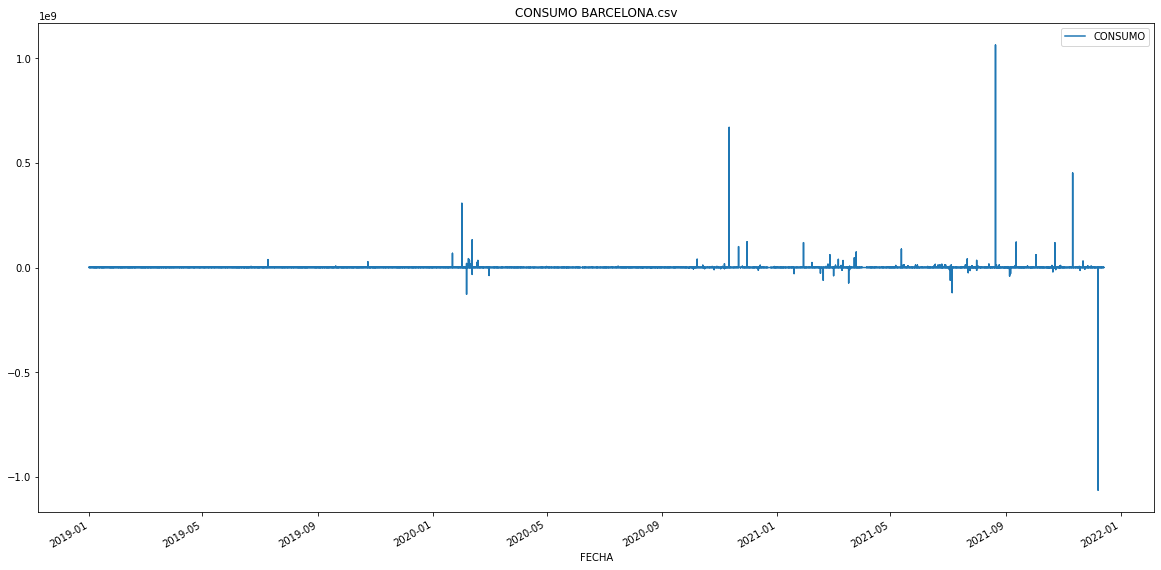

In [ ]:
final_df.plot(figsize=(20,10), x="FECHA", y="CONSUMO", label="CONSUMO", title="CONSUMO "+file_name).legend(loc="upper right")

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Agrupados/BARCELONA.CSV')

In [ ]:
#Para chequear si estamos frente a una serie temporal pero no lo hice funcionar

#for nombre_serie in final_df["LOCALIDAD"].unique():
    
#    serie = final_df[final_df["LOCALIDAD"] == nombre_serie]["FECHA"]
    
#    print("------------------------------------------------------------------")
    
#    print("Estamos trabajando con la serie {}\n".format(nombre_serie))
#    resultado_analisis = adfuller(serie)
    
#    valor_estadistico_adf = round(resultado_analisis[0], 3)
#    p_valor = round(resultado_analisis[1], 3)
    
#    print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
#    print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))
    
#   print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
#    print("p-valor: {}\n".format(p_valor))
    

Una vez agrupados los diferentes datasets, podemos llamarlos para trabajar con ellos cambiando el nombre en "file_name_uni". 

*Aunque considero que esto podría ser el principio de un notebook nuevo.* 

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Agrupados/'
file_name_uni ="CERDANYOLA.csv"
files = glob.glob(path + file_name_uni)

for f in files:
    # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_csv(f)

In [ ]:
temp_df.head(5)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Agrupados/'
file_extension = '*.csv'


files_path = glob.glob(path + file_extension)
files_path = [file.split("/")[-1] for file in files_path]

for file in files_path:
    df = pd.read_csv(path + file)
    plt.plot(df['FECHA'], df['CONSUMO'])
    plt.xlabel('Column X')
    plt.ylabel('Column Y')
    plt.title(file + ' Plot of Column X vs Column Y')
    plt.show()